In [1]:
#rstanがインストールされていないならインストールする
x<-installed.packages()
if(any(x[,1]== 'rstan') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter3.5")
    system("add-apt-repository -y ppa:marutter/c2d4u3.5") 
    system("apt-get update")
    system("apt install -y r-cran-rstan")
}

In [2]:
#rstanがインストールされていないならインストールする
x<-installed.packages()
if(any(x[,1]== 'rstan') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter3.5")
    system("add-apt-repository -y ppa:marutter/c2d4u3.5") 
    system("apt-get update")
    system("apt install -y libv8-dev")
    install.packages("V8")
    install.packages("rstan")
    system("apt install -y r-cran-rstan")
}

In [3]:
##2021年1月現在うまく動く
x<-installed.packages()
if(any(x[,1]== 'rstan') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter4.0")
    system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+") 
    system("add-apt-repository ppa:cran/v8") 
    system("apt-get update") 
    system("apt-get install libnode-dev") 
    system("apt-get install r-cran-rstan")
}


In [4]:
#Rstanパッケージの読み込み
library(rstan) 

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



In [5]:
#データの準備
coindata <- list(Y=21, T=30)  #データはlist型に. 30回投げて21回表が出た

In [6]:
#ここでstanのコードをstancodeという変数に入れます
stancode <- '
data{
  int Y;  //表が出た回数
  int T;  //試行回数
}

parameters{
  real<lower=0, upper=1> theta;  //知りたい表が出る確率θ
}

model{
  theta ~ uniform(0, 1); //0から1の一様分布（無情報事前分布）
  Y ~ binomial(T, theta);  //二項分布に従う
}

generated quantities{
  int y_pred;
  y_pred = binomial_rng(T,theta);
}
'

In [7]:
#MCMCの実行
fit1 <- stan(model_code = stancode, data=coindata) 


SAMPLING FOR MODEL 'e668f26b2251d199bae89d721637c5bb' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.015548 seconds (Warm-up)
Chain 1:                0.017864 seconds (Sampling)


In [8]:
#結果の要約
summary(fit1) #パラメータの平均値や収束判断の指標（Rhat）等を表示

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
theta,0.6865724,0.002067617,0.08219112,0.5188523,0.6302365,0.6910546,0.7446096,0.8400196,1580.191,1.001803
y_pred,20.5762500,0.074964123,3.54560697,13.0000000,18.0000000,21.0000000,23.0000000,27.0000000,2237.043,1.000459
lp__,-20.4040569,0.019108747,0.73923744,-22.5250959,-20.5493972,-20.1193185,-19.9334962,-19.8754998,1496.592,1.001407


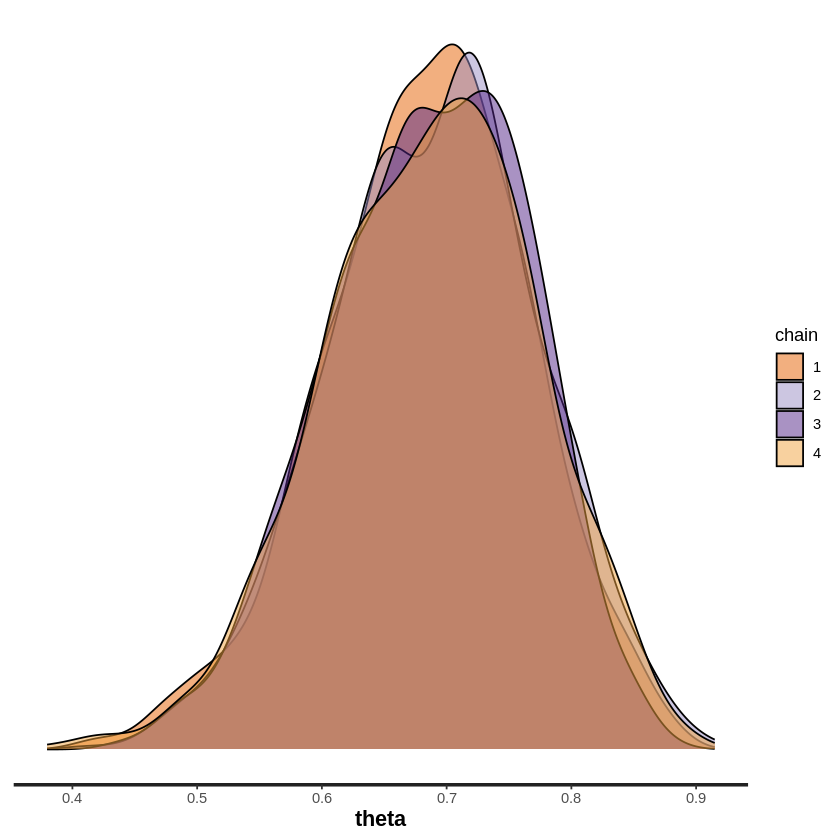

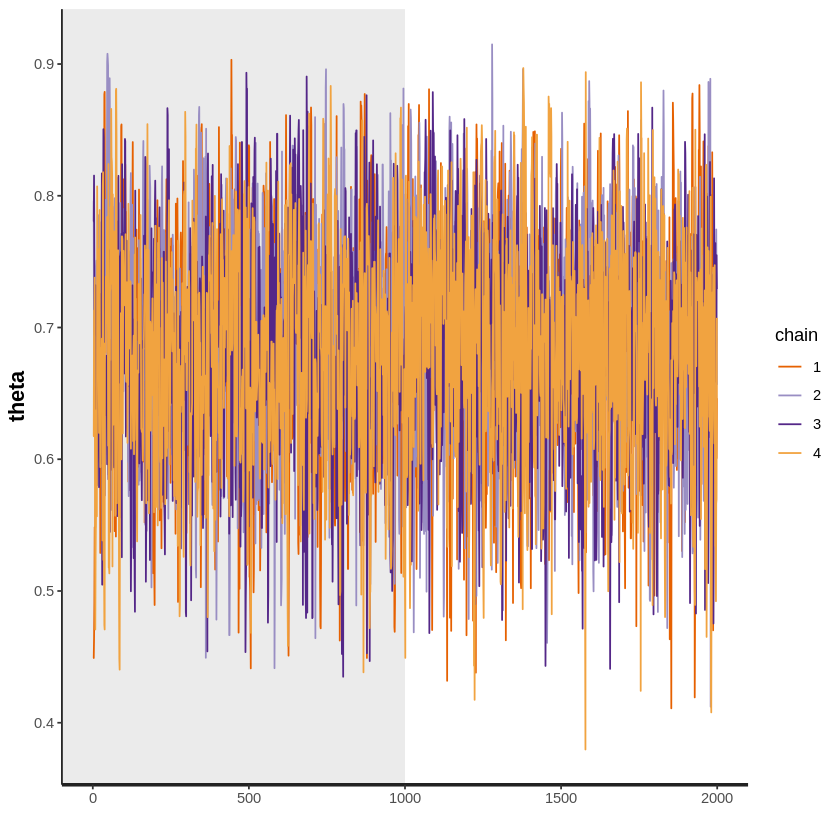

In [9]:
stan_dens(fit1, pars="theta", separate_chains = TRUE) #事後分布の密度
stan_trace(fit1, pars="theta",inc_warmup =T) #サンプリングの軌跡
theta <- rstan::extract(fit1)$theta #全サンプルの値をthetaに代入

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the rstan package.
  Please report the issue at <https://github.com/stan-dev/rstan/issues/>.”


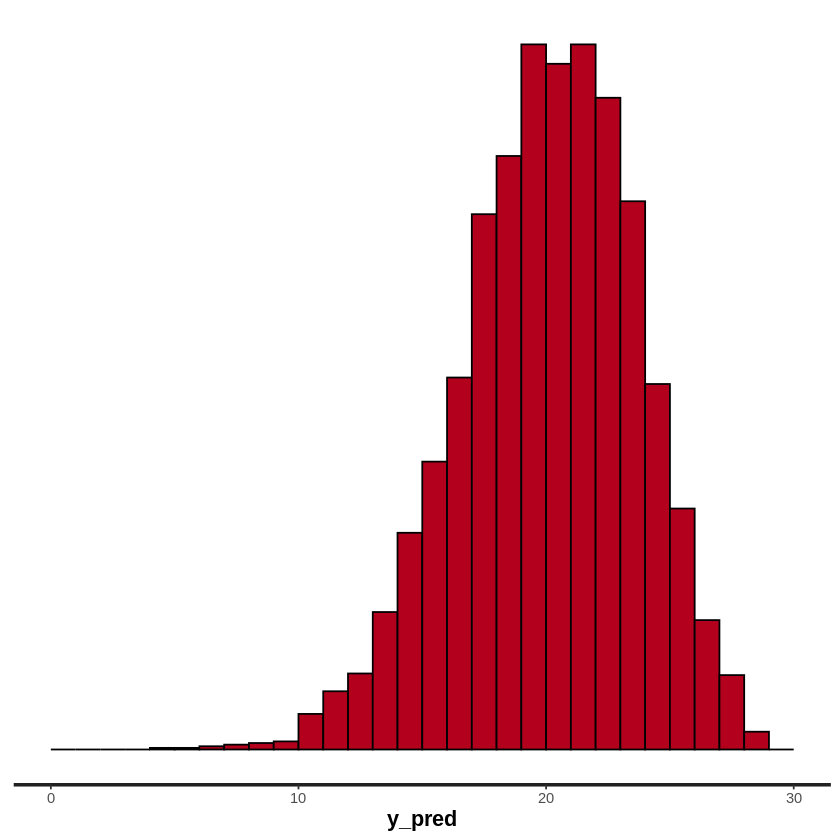

In [10]:
stan_hist(fit1, pars="y_pred", breaks=seq(0,30,1)) #予測